<a href="https://colab.research.google.com/github/JoseBatista2010/ML2023-Jose-Batista/blob/master/Localiza%C3%A7%C3%A3o_Indoor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ipin2016Dataset

A localização interna é um tópico importante para a comunidade de pesquisa em Inteligência Ambiente (AmI).

Nesses cenários, os avanços recentes em tecnologias vestíveis, particularmente smartwatches com sensores embutidos, e dispositivos pessoais, como smartphones, estão sendo vistos como a solução para concretizar o paradigma do Ambiente IntelIpin2016Datasetigente (SE).

Especificamente, cenários voltados para a **localização interna** representam um desafio fundamental a ser abordado. Muitos trabalhos tentam resolver o problema da localização interna, mas a falta de um conjunto de dados comum ou estruturas para comparar e avaliar soluções representa uma grande barreira a ser superada no campo. A indisponibilidade e incerteza de conjuntos de dados públicos dificultam a possibilidade de comparar diferentes algoritmos de localização interna. Isso constitui a principal motivação do conjunto de dados proposto descrito neste documento.

Coletamos impressões digitais de campo magnético e Wi-Fi, juntamente com dados de sensores inerciais durante duas campanhas realizadas no mesmo ambiente. A recuperação de dados sincronizados de um smartwatch e um smartphone usados pelos usuários com o objetivo de criar e apresentar um conjunto de dados publicamente disponível é o objetivo deste trabalho.

# Objetivo:
No dataset **Ipin2016Dataset** encontra-se o arquivo **watch_sens.csv**, um dataset com **58375** instâncias e **13** features. Todas as features são referentes à leitura de sensores presentes em diversos modelos de smartwatches disponíveis no mercado. O objetivo deste trabalho é verificar a viabilidade de prever o valor do sensor giroscópio a partir da leitura dos outros sensores que possuem funcionalidades relacionadas. Em um primeiro momento, a feature **GyroX** será o alvo.

- <h4> Montando o Drive para acessar o dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- <h4> Importando o dataset watch_sens.csv


In [ ]:
import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/UFC/2023_1/Machine_Learning/trabalho_ML/Ipin2016Dataset/watch_sens.csv')
indoors_ds = df

- <h4> Listando as features

In [ ]:
indoors_ds.head()

,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ
0,1422628680350,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1422628680445,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1422628680545,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1422628680645,0.200,3.653,8.763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1422628680744,0.235,3.691,8.867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- <h4> Verificando a correlação entre as features
<h5> Esse passo é importante, pois a partir dele é possível saber o quão uma feature se relaciona com outra. Uma correlação muito alta entre as features indica que uma pode ser expressa em função da outra.

<Axes: >

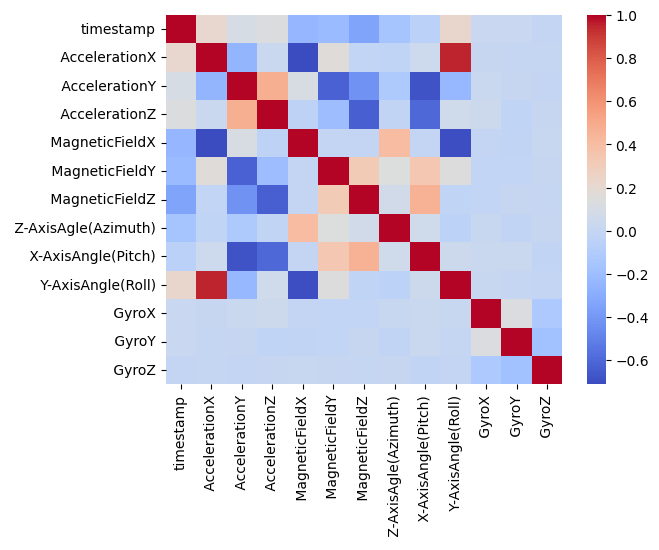

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = indoors_ds.corr()

# Imprimir a matriz de correlação
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')


Text(0.5, 1.0, 'Gráfico de Densidade')

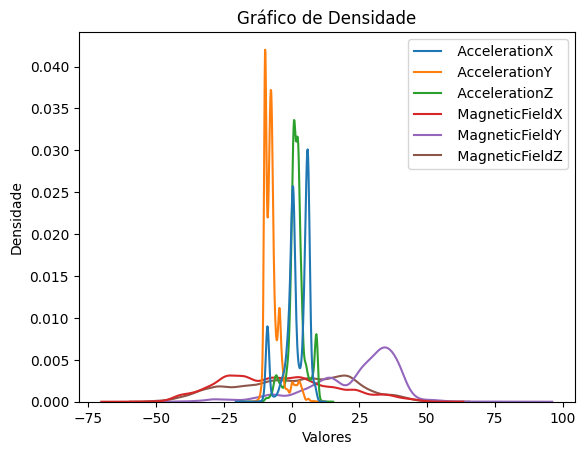

In [ ]:
sns.kdeplot(data=indoors_ds[[' AccelerationX', ' AccelerationY', ' AccelerationZ',
                             ' MagneticFieldX', ' MagneticFieldY', ' MagneticFieldZ']])
plt.pyplot.xlabel('Valores')
plt.pyplot.ylabel('Densidade')
plt.pyplot.title('Gráfico de Densidade')

- <h4> Normalizando e dividindo o dataset
<h5> Aqui, a feature timestamp foi desconsiderada devido à sua baixa influência nos treinos anteriores. A função MinMaxScaler do scikit-learn foi utilizada para normalizar o dataset e, em seguida, os dados foram divididos em treino e teste. É importante observar que as features GyroY e GyroZ também foram desconsideradas, pois em testes futuros será verificada a viabilidade de treinar um modelo para inferir possíveis valores para elas.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Inicializar o scaler para normalização Min-Max
scaler = MinMaxScaler()

X_ = indoors_ds.drop(['timestamp',' GyroX', ' GyroY', ' GyroZ'], axis=1)
y_ = indoors_ds[' GyroX']

X = scaler.fit_transform(X_)
y = scaler.fit_transform(y_.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- <h4> Usando Linear Regression
  <h5> Dada a natureza do problema o modelo Linear Regression é um dos primeiros a ser pensado. A métrica de avaliação utilizada será a MSE.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Criação do modelo de regressão linear
model = LinearRegression()

# Treinamento do modelo
model.fit(X_train, y_train)

# Realização da previsão
y_pred = model.predict(X_test)

# Cálculo do erro médio quadrado (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

r2 = r2_score(y_test, y_pred)
print('R²:', r2)

MSE: 0.001002709254444921
R²: 0.010929021196719013


#### Gráfico de densidade de **Y_pred** e **y**.

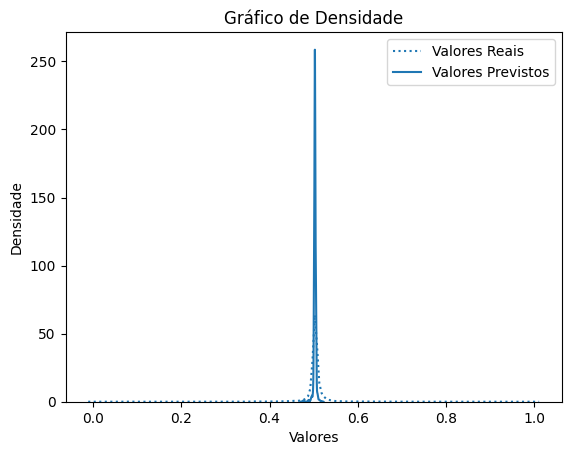

In [ ]:
# Plota o gráfico de densidade
sns.kdeplot(y, color='red', linestyle=':',label='Valores Reais')
sns.kdeplot(y_pred, label='Valores Previstos')
plt.pyplot.xlabel('Valores')
plt.pyplot.ylabel('Densidade')
plt.pyplot.title('Gráfico de Densidade')
plt.pyplot.legend()
plt.pyplot.show()

- <h4> Usando Decision Tree Regressor
<h5> Em segundo momento utiliza-se o modelo Decision Tree Regression a fim de obter melhores resultados, um MSE mais baixo.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Criar e treinar o modelo de árvore de decisão
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred2 = model2.predict(X_test)

# Calcular o erro médio quadrático (MSE)
mse2 = mean_squared_error(y_test, y_pred2)
print("MSE:", mse2)

r2 = r2_score(y_test, y_pred)
print('R²:', r2)

MSE: 0.0006456451519009321
R²: 0.010929021196719013


#### Gráfico de densidade de **Y_pred2** e **y**.

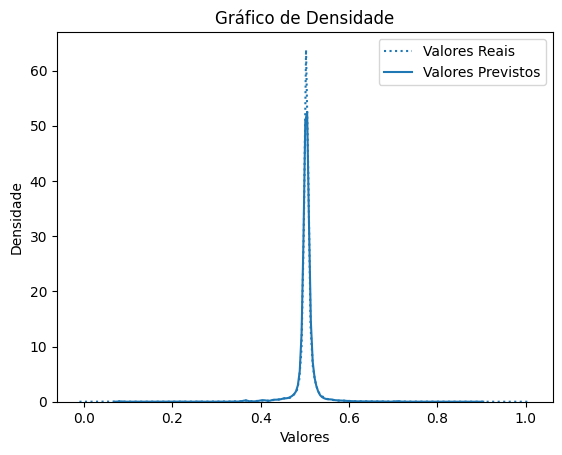

In [ ]:
# Plota o gráfico de densidade
sns.kdeplot(y, color='red', linestyle=':',label='Valores Reais')
sns.kdeplot(y_pred2, label='Valores Previstos')
plt.pyplot.xlabel('Valores')
plt.pyplot.ylabel('Densidade')
plt.pyplot.title('Gráfico de Densidade')
plt.pyplot.legend()
plt.pyplot.show()

- <h4> Usando Random Forest Regressor
<h5>   Objetivando um MSE ainda menor é feito o uso do modelo Random Forest Regressor, comumente utilizado em problemas dessa natureza.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Criar e treinar o modelo Random Forest
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred3 = model3.predict(X_test)

# Calcular o erro médio quadrático (MSE)
mse3 = mean_squared_error(y_test, y_pred3)
print("MSE:", mse3)

r2 = r2_score(y_test, y_pred)
print('R²:', r2)

<ipython-input-68-13bd9845f502>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train, y_train)


MSE: 0.0004503269875804943
R²: 0.010929021196719013


#### Gráfico de densidade de **Y_pred3** e **y**.

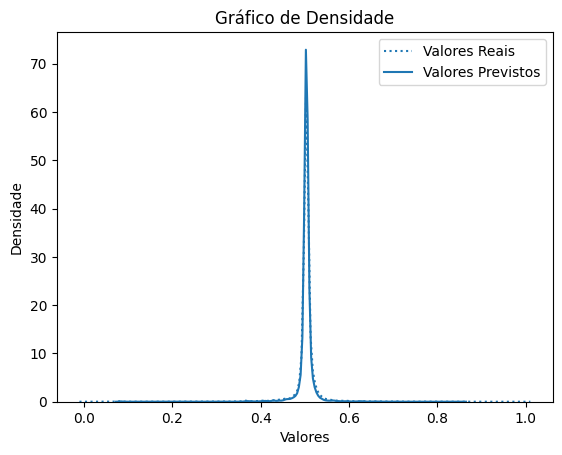

In [ ]:
# Plota o gráfico de densidade
sns.kdeplot(y, color='red', linestyle=':',label='Valores Reais')
sns.kdeplot(y_pred3, label='Valores Previstos')
plt.pyplot.xlabel('Valores')
plt.pyplot.ylabel('Densidade')
plt.pyplot.title('Gráfico de Densidade')
plt.pyplot.legend()
plt.pyplot.show()

- <h4> Conclusões parciais
<h5>  Apesar de qualquer problema que pode existir os modelos se comportaram como o esperado em termos de resultado. Sendo que do melhor para o "pior" temos: Random Forest Regressor, Decision Tree Regressor e Linear Regression.

#Continuando...
Estamos novamente dividindo o conjunto de dados, desta vez direcionando os algoritmos de aprendizado para a característica **GyroY** e **GyroZ**, que representam os eixos y e z do acelerômetro. É importante destacar que nosso objetivo é avaliar a possibilidade de utilizar algoritmos de aprendizado de máquina em um smartwatch para obter os valores de um sensor, aproveitando as leituras dos outros sensores. A divisão redundante do conjunto de dados ocorre devido à possibilidade de precisarmos fazê-la de maneira diferente no futuro.

Algumas pesquisas foram feitas a fim de verificar  viabilidade do que aqui estou tentando. A área que fala sobre isso é cohecida como **fusão de sensores**, que em um certo nível engloba **ML** e **EC**.

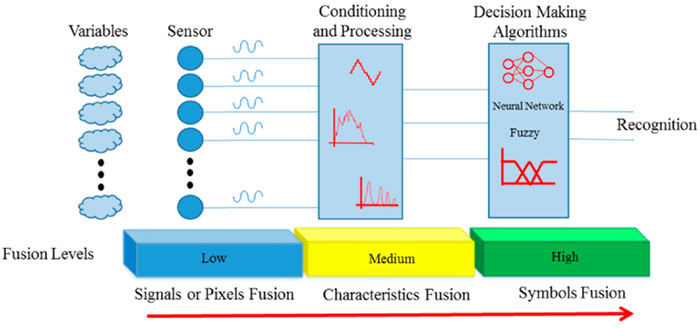

In [ ]:
# Inicializar o scaler para normalização Min-Max
scaler = MinMaxScaler()

X_ = indoors_ds.drop(['timestamp',' GyroX', ' GyroY', ' GyroZ'], axis=1)
y_ = indoors_ds[' GyroY']

X = scaler.fit_transform(X_)
y = scaler.fit_transform(y_.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- <h4> Usando Linear Regression para o GyroY:

In [ ]:
# Criação do modelo de regressão linear
model_y1 = LinearRegression()

# Treinamento do modelo
model_y1.fit(X_train, y_train)

# Realização da previsão
y_pred = model_y1.predict(X_test)

# Cálculo do erro médio quadrado (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

r2 = r2_score(y_test, y_pred)
print('R²:', r2)

MSE: 0.0004015286409551127
R²: 0.002183310201529065


- <h4>Plotando grafico de densidade para o Linear Regression:

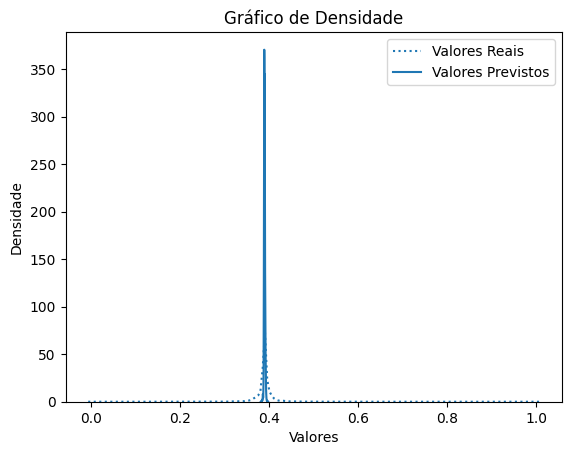

In [ ]:
# Plota o gráfico de densidade
sns.kdeplot(y, color='red', linestyle=':',label='Valores Reais')
sns.kdeplot(y_pred, label='Valores Previstos')
plt.pyplot.xlabel('Valores')
plt.pyplot.ylabel('Densidade')
plt.pyplot.title('Gráfico de Densidade')
plt.pyplot.legend()
plt.pyplot.show()

- <h4> Usando Decision Tree Regressor para o GyroY:

In [ ]:

# Criar e treinar o modelo de árvore de decisão
model_y2 = DecisionTreeRegressor()
model_y2.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model_y2.predict(X_test)

# Calcular o erro médio quadrático (MSE)
mse2 = mean_squared_error(y_test, y_pred)
print("MSE:", mse2)

r2 = r2_score(y_test, y_pred)
print('R²:', r2)

MSE: 0.00022882850466622817
R²: 0.43135089812157423


- <h4>Gráfico de densidade para o Decision Tree Regressor:

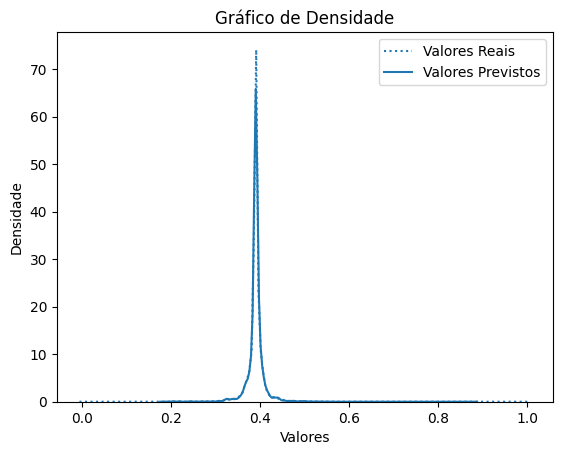

In [ ]:
# Plota o gráfico de densidade
sns.kdeplot(y, color='red', linestyle=':',label='Valores Reais')
sns.kdeplot(y_pred, label='Valores Previstos')
plt.pyplot.xlabel('Valores')
plt.pyplot.ylabel('Densidade')
plt.pyplot.title('Gráfico de Densidade')
plt.pyplot.legend()
plt.pyplot.show()

- <h4> Usando Random Forest Regressor para o GyroY:

In [ ]:
# Criar e treinar o modelo Random Forest
model_y3 = RandomForestRegressor()
model_y3.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model_y3.predict(X_test)

# Calcular o erro médio quadrático (MSE)
mse3 = mean_squared_error(y_test, y_pred)
print("MSE:", mse3)

r2 = r2_score(y_test, y_pred)
print('R²:', r2)

<ipython-input-75-43faba6e35a8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_y3.fit(X_train, y_train)


MSE: 0.0001203874151811385
R²: 0.7008318713611599


- <h4> Gráfico de densidade Random Forest Regressor:

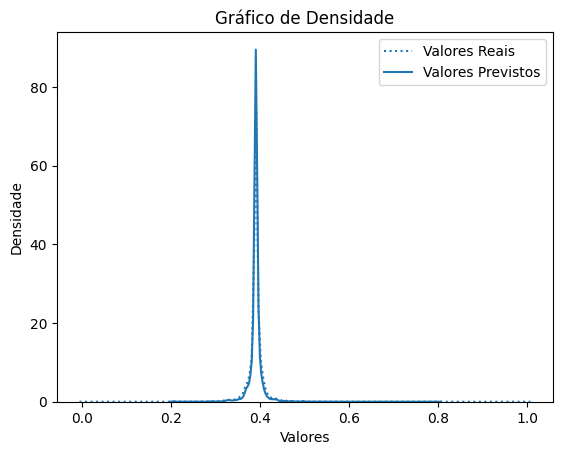

In [ ]:
# Plota o gráfico de densidade
sns.kdeplot(y, color='red', linestyle=':',label='Valores Reais')
sns.kdeplot(y_pred, label='Valores Previstos')
plt.pyplot.xlabel('Valores')
plt.pyplot.ylabel('Densidade')
plt.pyplot.title('Gráfico de Densidade')
plt.pyplot.legend()
plt.pyplot.show()

- <h4> Divisão e normalização do dataset para GyroZ:

In [ ]:
# Inicializar o scaler para normalização Min-Max
scaler = MinMaxScaler()

X_ = indoors_ds.drop(['timestamp',' GyroX', ' GyroY', ' GyroZ'], axis=1)
y_ = indoors_ds[' GyroZ']

X = scaler.fit_transform(X_)
y = scaler.fit_transform(y_.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- <h4> Usando Linear Regression para o GyroZ:

In [ ]:
# Criação do modelo de regressão linear
model_z1 = LinearRegression()

# Treinamento do modelo
model_z1.fit(X_train, y_train)

# Realização da previsão
y_pred = model_z1.predict(X_test)

# Cálculo do erro médio quadrado (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

r2 = r2_score(y_test, y_pred)
print('R²:', r2)

MSE: 0.0007580209524873685
R²: 0.0012601677047545667


- <h4>Grafico de densidade para Linear Regression:

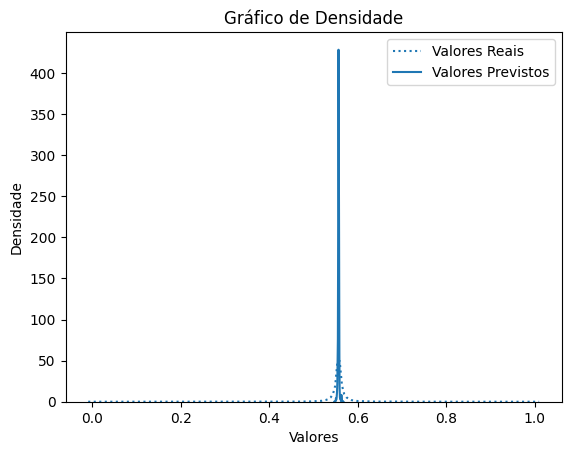

In [ ]:
# Plota o gráfico de densidade
sns.kdeplot(y, color='red', linestyle=':',label='Valores Reais')
sns.kdeplot(y_pred, label='Valores Previstos')
plt.pyplot.xlabel('Valores')
plt.pyplot.ylabel('Densidade')
plt.pyplot.title('Gráfico de Densidade')
plt.pyplot.legend()
plt.pyplot.show()

- <h4> Usando Decision Tree para o GyroZ:

In [ ]:
# Criar e treinar o modelo de árvore de decisão
model_z2 = DecisionTreeRegressor()
model_z2.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model_z2.predict(X_test)

# Calcular o erro médio quadrático (MSE)
mse2 = mean_squared_error(y_test, y_pred)
print("MSE:", mse2)

r2 = r2_score(y_test, y_pred)
print('R²:', r2)

MSE: 0.00047783103548980577
R²: 0.37042784017437225


- <h4> Gráfico de densidade para o Decision Tree:

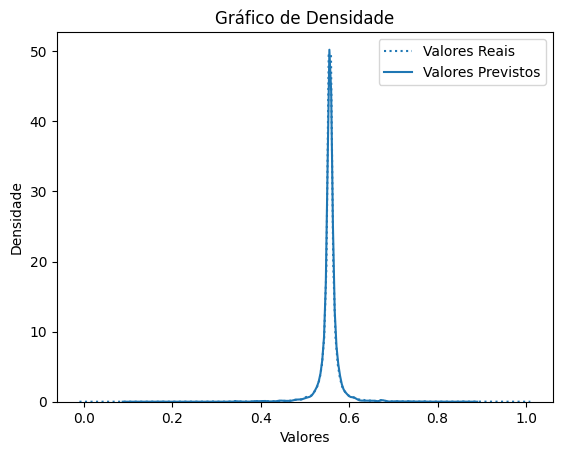

In [ ]:
# Plota o gráfico de densidade
sns.kdeplot(y, color='red', linestyle=':',label='Valores Reais')
sns.kdeplot(y_pred, label='Valores Previstos')
plt.pyplot.xlabel('Valores')
plt.pyplot.ylabel('Densidade')
plt.pyplot.title('Gráfico de Densidade')
plt.pyplot.legend()
plt.pyplot.show()

- <h4> Utilizando o Random Forest para o GyroZ:

In [ ]:
# Criar e treinar o modelo Random Forest
model_z3 = RandomForestRegressor()
model_z3.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model_z3.predict(X_test)

# Calcular o erro médio quadrático (MSE)
mse3 = mean_squared_error(y_test, y_pred)
print("MSE:", mse3)

r2 = r2_score(y_test, y_pred)
print('R²:', r2)

<ipython-input-82-91aefe5ba6bb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_z3.fit(X_train, y_train)


MSE: 0.0002863757529795093
R²: 0.6226821032246521


- <h4>Grafico de densidade para o Random Forest:

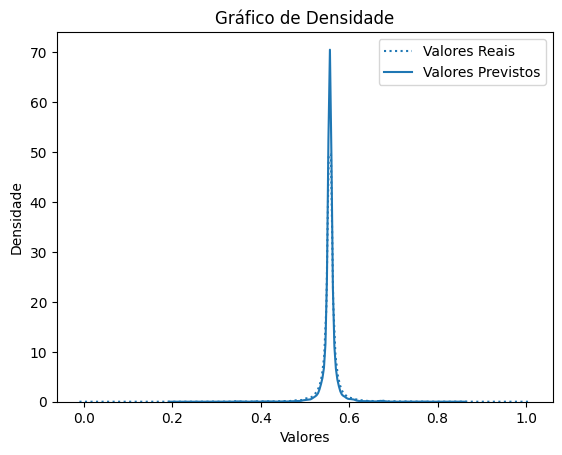

In [ ]:
# Plota o gráfico de densidade
sns.kdeplot(y, color='red', linestyle=':',label='Valores Reais')
sns.kdeplot(y_pred, label='Valores Previstos')
plt.pyplot.xlabel('Valores')
plt.pyplot.ylabel('Densidade')
plt.pyplot.title('Gráfico de Densidade')
plt.pyplot.legend()
plt.pyplot.show()

#Redes Neurais
Aqui estou aplicando redes neurais para gerar as features GyroX, GyroY e GyroZ simultaneamente. O formato da rede e os hiperparâmetros foram selecionados com base em experimentação empírica. Inicialmente, utilizei a função de ativação 'ReLU', mas também experimentei a 'LeakyReLU', variando o parâmetro de inclinação (alfa) de 0.1 até 0.9. No entanto, acabei optando por utilizar a função de ativação 'linear'. O número de épocas também foi escolhido empiricamente, assim como o otimizador 'adam' e a função de perda 'mse'.

In [ ]:

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Carregar o conjunto de dados
dataset = indoors_ds

# Separar as features de entrada (X) e as features de saída (Y)
X = dataset.iloc[:, 0:10].values
Y = dataset.iloc[:, 10:13].values

# Pré-processamento dos dados
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Definir a arquitetura da rede neural
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='linear', input_shape=(10,)),
    tf.keras.layers.Dense(16,activation='linear'),
    tf.keras.layers.Dense(16,activation='linear'),
    tf.keras.layers.Dense(3)
])



# Compilar o modelo
model.compile(optimizer='adam', loss='mse')

# Treinar o modelo
model.fit(X_train, Y_train, epochs=15, batch_size=32)

# Avaliar o modelo no conjunto de teste
loss = model.evaluate(X_test, Y_test)
print('Loss:', loss)


Epoch 1/15
1460/1460 [==============================] - 4s 2ms/step - loss: 0.2653
Epoch 2/15
1460/1460 [==============================] - 3s 2ms/step - loss: 0.2609
Epoch 3/15
1460/1460 [==============================] - 4s 3ms/step - loss: 0.2604
Epoch 4/15
1460/1460 [==============================] - 3s 2ms/step - loss: 0.2601
Epoch 5/15
1460/1460 [==============================] - 3s 2ms/step - loss: 0.2600
Epoch 6/15
1460/1460 [==============================] - 3s 2ms/step - loss: 0.2598
Epoch 7/15
1460/1460 [==============================] - 3s 2ms/step - loss: 0.2597
Epoch 8/15
1460/1460 [==============================] - 4s 3ms/step - loss: 0.2597
Epoch 9/15
1460/1460 [==============================] - 3s 2ms/step - loss: 0.2596
Epoch 10/15
1460/1460 [==============================] - 3s 2ms/step - loss: 0.2595
Epoch 11/15
1460/1460 [==============================] - 3s 2ms/step - loss: 0.2596
Epoch 12/15
1460/1460 [==============================] - 4s 3ms/step - loss: 0.2595
E

#Conclusão
Os resultados obtidos mostraram-se favoráveis à possibilidade de deduzir os valores do giroscópio a partir da leitura de outros sensores. No entanto, é importante destacar que apenas um estudo mais aprofundado poderá confirmar essa hipótese e, consequentemente, permitir a aplicação mais específica dos algoritmos de aprendizado de máquina para obter resultados adequados.